In [7]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
import scipy.stats as stats
import pandas as pd
import urllib
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt
import numpy as np

In [40]:
pd.options.display.float_format = '{:.5f}'.format

In [44]:
df_train = pd.read_csv("2019train.csv", encoding='utf-8')

In [45]:
df_train

,Unnamed: 0,방송일시,월,그룹코드,노출(분),마더코드,상품코드,상품명,상품군,판매단가,...,전운량,비눈여부,비눈여부_평균이상,미세먼지,초미세먼지,취급액boxcox,시청률평균,시청률중앙값,시청률최고값,0.016평균값
0,1,2019-01-01 6:00,1,2,20.00000,100346.00000,201079.00000,테이트 여성 셀린니트3종,의류,39900.00000,...,6.59140,1,1,38.39646,26.50526,130.05416,0.00854,0.00025,0.02600,0.15000
1,2,2019-01-01 6:00,1,1,20.00000,100346.00000,201072.00000,테이트 남성 셀린니트3종,의류,39900.00000,...,6.59140,1,1,38.39646,26.50526,109.81525,0.00854,0.00025,0.02600,0.15000
2,3,2019-01-01 6:20,1,1,20.00000,100346.00000,201072.00000,테이트 남성 셀린니트3종,의류,39900.00000,...,6.59140,1,1,38.39646,26.50526,121.58209,0.01302,0.00762,0.04900,0.40000
3,4,2019-01-01 6:20,1,2,20.00000,100346.00000,201079.00000,테이트 여성 셀린니트3종,의류,39900.00000,...,6.59140,1,1,38.39646,26.50526,144.68425,0.01302,0.00762,0.04900,0.40000
4,5,2019-01-01 6:40,1,1,20.00000,100346.00000,201072.00000,테이트 남성 셀린니트3종,의류,39900.00000,...,6.59140,1,1,38.39646,26.50526,143.31342,0.01219,0.00025,0.06900,0.20000
5,6,2019-01-01 6:40,1,2,20.00000,100346.00000,201079.00000,테이트 여성 셀린니트3종,의류,39900.00000,...,6.59140,1,1,38.39646,26.50526,154.77495,0.01219,0.00025,0.06900,0.20000
6,7,2019-01-01 7:00,1,7,20.00000,100305.00000,200974.00000,오모떼 레이스 파운데이션 브라,속옷,59000.00000,...,6.32258,1,1,37.95214,26.26913,144.03100,0.00776,0.00025,0.03700,0.20000
7,8,2019-01-01 7:20,1,7,20.00000,100305.00000,200974.00000,오모떼 레이스 파운데이션 브라,속옷,59000.00000,...,6.32258,1,1,37.95214,26.26913,174.24491,0.00073,0.00025,0.00500,0.00000
8,9,2019-01-01 7:40,1,7,20.00000,100305.00000,200974.00000,오모떼 레이스 파운데이션 브라,속옷,59000.00000,...,6.32258,1,1,37.95214,26.26913,194.39188,0.00328,0.00025,0.03100,0.10000
9,10,2019-01-01 8:00,1,10,20.00000,100808.00000,202377.00000,CERINI by PAT 남성 소프트 기모 릴렉스팬츠,의류,59900.00000,...,5.38710,1,1,38.47089,26.72872,175.35685,0.00094,0.00025,0.01400,0.00000


{'whiskers': [<matplotlib.lines.Line2D at 0x1ce953ca518>,
 'caps': [<matplotlib.lines.Line2D at 0x1ce953caeb8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ce953ca3c8>],
 'medians': [<matplotlib.lines.Line2D at 0x1ce953d37b8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ce953d3c18>],
 'means': []}

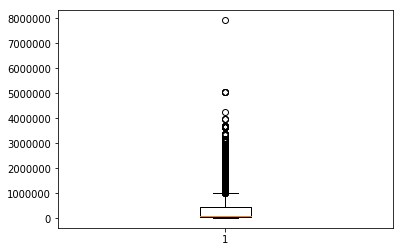

In [12]:
plt.boxplot(df_train['판매단가'])

In [17]:
df_train_10=df_train[df_train['판매단가']<100000]

{'whiskers': [<matplotlib.lines.Line2D at 0x1ce95491eb8>,
 'caps': [<matplotlib.lines.Line2D at 0x1ce9549a898>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ce95491d68>],
 'medians': [<matplotlib.lines.Line2D at 0x1ce954a4198>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ce954a45c0>],
 'means': []}

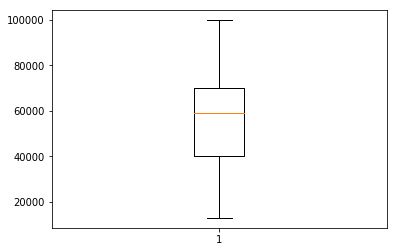

In [18]:
plt.boxplot(df_train_10['판매단가'])

In [19]:
df_train_10['판매단가'].describe()

count    16386.000000
mean     59182.323325
std      18811.879160
min      12800.000000
25%      39900.000000
50%      59000.000000
75%      69900.000000
max      99900.000000
Name: 판매단가, dtype: float64

In [25]:
df_unique=df_train.drop_duplicates(['판매단가'])

In [91]:
df_unique.sort_values(by='판매단가')['판매단가']

22367     12800.00000
19636     24900.00000
28256     28900.00000
8731      29000.00000
67        29800.00000
2098      29900.00000
110       30900.00000
28389     31000.00000
105       32900.00000
23526     33900.00000
5453      34000.00000
19989     34800.00000
4099      35000.00000
28304     35600.00000
22368     35900.00000
22419     36900.00000
10508     38900.00000
177       39000.00000
35        39800.00000
0         39900.00000
22278     40800.00000
212       40900.00000
28210     41900.00000
6076      42000.00000
21099     42900.00000
429       43900.00000
6872      44000.00000
14819     44800.00000
23697     44900.00000
4524      45800.00000
             ...     
24384   2600000.00000
19389   2609000.00000
19393   2649000.00000
30328   2660000.00000
30866   2682000.00000
16343   2690000.00000
230     2700000.00000
19392   2749000.00000
26214   2750000.00000
24381   2780000.00000
8260    2790000.00000
7206    2800000.00000
13834   2835000.00000
32370   2840000.00000
1519    28

In [82]:
df_unique[df_unique['판매단가']==12800]

,Unnamed: 0,방송일시,월,그룹코드,노출(분),마더코드,상품코드,상품명,상품군,판매단가,...,전운량,비눈여부,비눈여부_평균이상,미세먼지,초미세먼지,취급액boxcox,시청률평균,시청률중앙값,시청률최고값,0.016평균값
22367,22368,2019-08-15 23:00,8,24222,20.00000,100791.00000,202352.00000,도루코 페이스5 면도날 4개입,생활용품,12800.00000,...,5.62366,1,1,11.49057,4.67273,59.74760,0.00025,0.00025,0.00025,0.00000


{'whiskers': [<matplotlib.lines.Line2D at 0x1ce978a7b38>,
 'caps': [<matplotlib.lines.Line2D at 0x1ce978b1518>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ce978a79e8>],
 'medians': [<matplotlib.lines.Line2D at 0x1ce978b1d68>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ce978b8208>],
 'means': []}

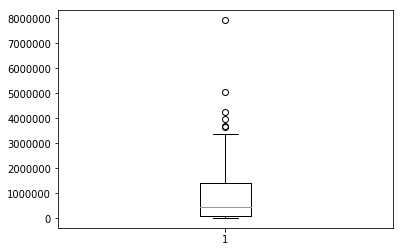

In [27]:
plt.boxplot(df_unique['판매단가'])

In [28]:
plt.plot( df_train.groupby(df_train['상품군']), df_train['취급액'], linestyle='--')


SyntaxError: invalid syntax (<ipython-input-28-e5c892fe55d4>, line 1)

In [37]:
df_train.groupby(df_train['상품군']).mean()

,Unnamed: 0,월,그룹코드,노출(분),마더코드,상품코드,판매단가,취급액,일,반기,...,전운량,비눈여부,비눈여부_평균이상,미세먼지,초미세먼지,취급액boxcox,시청률평균,시청률중앙값,시청률최고값,0.016평균값
상품군,,,,,,,,,,,,,,,,,,,,,
가구,16458.507173,6.133734,11030.259139,20.174927,100310.766775,201004.048589,7.566252e+05,1.269638e+07,13.572883,1.430819,...,5.333542,0.519667,0.236465,43.609592,24.944076,155.409325,0.003022,0.001870,0.013408,0.085926
가전,13910.149465,5.256514,6736.950313,20.069683,100237.523733,200742.182185,1.477393e+06,1.800411e+07,14.329428,1.319531,...,5.279578,0.553626,0.271056,42.948296,23.576518,169.269075,0.003034,0.001773,0.013747,0.063284
건강기능,18125.646893,6.569209,13526.754237,20.208616,100448.069209,201367.450565,8.454414e+04,2.487733e+07,17.399718,1.521186,...,5.419848,0.583333,0.217514,40.090214,22.312858,185.804954,0.006920,0.005194,0.021585,0.178995
농수축,17337.357324,6.343548,11769.338206,19.662409,100433.205791,201357.874613,4.664948e+04,4.244896e+07,15.942086,1.561428,...,5.529728,0.582513,0.254428,40.760965,21.077897,213.675583,0.004499,0.003143,0.015894,0.106558
생활용품,20326.492584,7.346067,18219.673258,20.700856,100414.896180,201278.951910,1.732744e+05,1.921735e+07,16.214382,1.648989,...,5.491318,0.534831,0.234157,39.642816,22.058817,168.846113,0.004642,0.003050,0.018225,0.111039
속옷,14796.341960,5.513216,12535.030011,20.097775,100459.670980,201427.599945,7.807596e+04,2.637224e+07,15.846090,1.384361,...,5.278077,0.547632,0.242841,43.747304,24.460093,183.923776,0.004885,0.003406,0.017466,0.112355
의류,15203.667083,5.646088,14169.457886,19.908174,100375.453387,201204.106223,1.492667e+05,2.391554e+07,16.013747,1.367658,...,5.200694,0.547863,0.251687,41.819952,23.493174,182.702060,0.004628,0.002954,0.018006,0.110642
이미용,18911.436813,6.889194,16727.284799,19.919168,100305.603480,201000.943223,5.040385e+04,3.592867e+07,15.638278,1.597985,...,5.352568,0.551282,0.250000,38.628135,20.753994,202.422982,0.005364,0.003734,0.018725,0.134368
잡화,18872.519050,6.872802,17903.136870,21.971254,100429.506155,201307.900352,3.938560e+05,1.678878e+07,15.618406,1.595838,...,5.351319,0.555393,0.239449,37.710250,20.267113,165.780290,0.004901,0.003018,0.019443,0.117165


In [41]:
df_train.groupby(df_train['상품군']).mean()['판매단가']

상품군
가구      756625.17353
가전     1477393.45587
건강기능     84544.13842
농수축      46649.47990
생활용품    173274.38202
속옷       78075.96366
의류      149266.70832
이미용      50403.84615
잡화      393856.03751
주방      153002.28731
침구       77602.40964
Name: 판매단가, dtype: float64

In [36]:
df_train.groupby(df_train['상품군'])['판매단가']

In [34]:
df_train['상품군']==

In [42]:
df_train.groupby(df_train['상품군'])['판매단가']

In [53]:
df_train[df_train['상품군']=='가전']['판매단가'].mean()

1477393.4558675014

In [96]:
df_train.groupby(df_train['판매단가'])['취급액'].mean()

판매단가
12800.00000       121000.00000
24900.00000      3703666.66667
28900.00000     15438400.00000
29000.00000     29245142.20183
29800.00000     21145046.63212
29900.00000     30740914.06250
30900.00000     35029555.36332
31000.00000       344750.00000
32900.00000     38184468.75000
33900.00000     30007500.00000
34000.00000     24834916.66667
34800.00000     19929357.14286
35000.00000     44415133.33333
35600.00000      1711000.00000
35900.00000       974666.66667
36900.00000     44604393.25843
38900.00000     38858258.42697
39000.00000     25244241.37931
39800.00000     31270664.22466
39900.00000     28216945.42659
40800.00000     36261888.88889
40900.00000     39001733.09609
41900.00000     31709500.00000
42000.00000       473000.00000
42900.00000     23791200.00000
43900.00000     45707383.17757
44000.00000     26570468.25397
44800.00000     27917108.69565
44900.00000     56809518.51852
45800.00000     15416833.33333
                     ...      
2600000.00000    7289000.00000
260

In [64]:
a

판매단가
False   17386809.61849
True    27919030.69694
Name: 취급액, dtype: float64

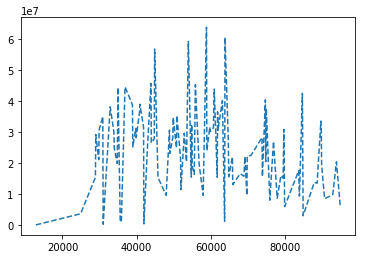

In [124]:
plt.plot(df_train.groupby(df_train['판매단가'])['취급액'].mean().head(100) , linestyle='--')


In [56]:
df_train.groupby(df_train['판매단가']).

{'whiskers': [<matplotlib.lines.Line2D at 0x1ce9b232358>,
 'caps': [<matplotlib.lines.Line2D at 0x1ce9b232cc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ce9b232208>],
 'medians': [<matplotlib.lines.Line2D at 0x1ce9b23d5c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ce9b23da20>],
 'means': []}

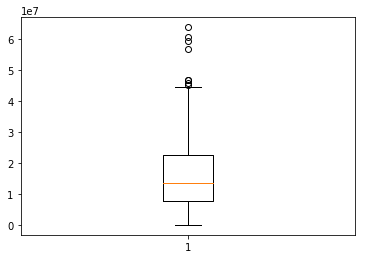

In [59]:
plt.boxplot(df_train.groupby(df_train['판매단가'])['취급액'].mean())

In [100]:
df_unique['판매단가']

0         39900.00000
6         59000.00000
9         59900.00000
12        79000.00000
15        79900.00000
18        69900.00000
20        60900.00000
23       109000.00000
25       119000.00000
32        49900.00000
34        61000.00000
35        39800.00000
44       489000.00000
45       439000.00000
50       499000.00000
53       299000.00000
55        89900.00000
67        29800.00000
70        69000.00000
79       158000.00000
80       148000.00000
81       168000.00000
93       238000.00000
94       228000.00000
95       218000.00000
96       208000.00000
105       32900.00000
110       30900.00000
122       89800.00000
128       89000.00000
             ...     
27870   7930000.00000
28210     41900.00000
28256     28900.00000
28271    418000.00000
28303     55600.00000
28304     35600.00000
28389     31000.00000
28522     58900.00000
28609   4250000.00000
28869     90800.00000
28968    127000.00000
30261    123000.00000
30325   1050000.00000
30326   1110000.00000
30328   26

In [101]:
model = ols('판매단가 ~ C(취급액)', df_train).fit()


MemoryError: 

In [116]:
df_train.groupby(df_train['판매단가'])['취급액'].count()

판매단가
12800.00000         3
24900.00000         3
28900.00000         5
29000.00000       218
29800.00000       193
29900.00000       128
30900.00000       578
31000.00000         4
32900.00000       192
33900.00000        12
34000.00000        12
34800.00000        42
35000.00000        15
35600.00000         6
35900.00000         3
36900.00000        89
38900.00000       267
39000.00000       232
39800.00000       819
39900.00000      1301
40800.00000        27
40900.00000       281
41900.00000         6
42000.00000         3
42900.00000        15
43900.00000       107
44000.00000       126
44800.00000        46
44900.00000        27
45800.00000         6
                 ... 
2600000.00000       1
2609000.00000       3
2649000.00000       1
2660000.00000       3
2682000.00000       2
2690000.00000      30
2700000.00000     105
2749000.00000       4
2750000.00000      29
2780000.00000       1
2790000.00000      37
2800000.00000      82
2835000.00000       4
2840000.00000       6
28800

In [132]:
df_train_mean=df_train.groupby(df_train['판매단가'])['취급액'].mean()

In [122]:
df_train.groupby(df_train['판매단가'])['취급액'].mean().describe()

count        376.00000
mean    16675187.84048
std     11734314.94083
min       121000.00000
25%      7790692.30769
50%     13588472.75641
75%     22588293.47826
max     63819240.00000
Name: 취급액, dtype: float64

In [126]:
df_train.groupby(df_train['판매단가'])['취급액']

In [130]:
df_train.sort_values(by="취급액", ascending=False).groupby(df_train['판매단가'])['취급액'].mean()


판매단가
12800.00000       121000.00000
24900.00000      3703666.66667
28900.00000     15438400.00000
29000.00000     29245142.20183
29800.00000     21145046.63212
29900.00000     30740914.06250
30900.00000     35029555.36332
31000.00000       344750.00000
32900.00000     38184468.75000
33900.00000     30007500.00000
34000.00000     24834916.66667
34800.00000     19929357.14286
35000.00000     44415133.33333
35600.00000      1711000.00000
35900.00000       974666.66667
36900.00000     44604393.25843
38900.00000     38858258.42697
39000.00000     25244241.37931
39800.00000     31270664.22466
39900.00000     28216945.42659
40800.00000     36261888.88889
40900.00000     39001733.09609
41900.00000     31709500.00000
42000.00000       473000.00000
42900.00000     23791200.00000
43900.00000     45707383.17757
44000.00000     26570468.25397
44800.00000     27917108.69565
44900.00000     56809518.51852
45800.00000     15416833.33333
                     ...      
2600000.00000    7289000.00000
260

In [137]:
df_train_mean

판매단가
12800.00000       121000.00000
24900.00000      3703666.66667
28900.00000     15438400.00000
29000.00000     29245142.20183
29800.00000     21145046.63212
29900.00000     30740914.06250
30900.00000     35029555.36332
31000.00000       344750.00000
32900.00000     38184468.75000
33900.00000     30007500.00000
34000.00000     24834916.66667
34800.00000     19929357.14286
35000.00000     44415133.33333
35600.00000      1711000.00000
35900.00000       974666.66667
36900.00000     44604393.25843
38900.00000     38858258.42697
39000.00000     25244241.37931
39800.00000     31270664.22466
39900.00000     28216945.42659
40800.00000     36261888.88889
40900.00000     39001733.09609
41900.00000     31709500.00000
42000.00000       473000.00000
42900.00000     23791200.00000
43900.00000     45707383.17757
44000.00000     26570468.25397
44800.00000     27917108.69565
44900.00000     56809518.51852
45800.00000     15416833.33333
                     ...      
2600000.00000    7289000.00000
260

In [140]:
df_train_mean.sort_values()

판매단가
12800.00000       121000.00000
31000.00000       344750.00000
42000.00000       473000.00000
35900.00000       974666.66667
63800.00000      1317818.18182
850000.00000     1461000.00000
35600.00000      1711000.00000
440000.00000     1862000.00000
336000.00000     1956250.00000
349000.00000     2131200.00000
759000.00000     2381500.00000
669000.00000     2608000.00000
350000.00000     2611000.00000
400000.00000     2618923.07692
889000.00000     2777000.00000
1034100.00000    2915500.00000
1520000.00000    3057000.00000
750000.00000     3073941.17647
85000.00000      3080000.00000
224000.00000     3105250.00000
370000.00000     3186500.00000
1385000.00000    3572000.00000
890000.00000     3600857.14286
1340000.00000    3626000.00000
24900.00000      3703666.66667
829000.00000     3715000.00000
1169000.00000    3779500.00000
530000.00000     4011666.66667
2390000.00000    4017000.00000
1299000.00000    4026583.33333
                     ...      
61900.00000     36566000.00000
254

In [160]:
df_train_mean_qcut = pd.qcut(df_train_mean, 5, labels=[5,4,3,2,1])

In [162]:
df_train_mean_qcut

판매단가
12800.00000      5
24900.00000      5
28900.00000      3
29000.00000      1
29800.00000      2
29900.00000      1
30900.00000      1
31000.00000      5
32900.00000      1
33900.00000      1
34000.00000      2
34800.00000      2
35000.00000      1
35600.00000      5
35900.00000      5
36900.00000      1
38900.00000      1
39000.00000      2
39800.00000      1
39900.00000      1
40800.00000      1
40900.00000      1
41900.00000      1
42000.00000      5
42900.00000      2
43900.00000      1
44000.00000      1
44800.00000      1
44900.00000      1
45800.00000      3
                ..
2600000.00000    4
2609000.00000    4
2649000.00000    5
2660000.00000    3
2682000.00000    5
2690000.00000    4
2700000.00000    3
2749000.00000    3
2750000.00000    3
2780000.00000    4
2790000.00000    4
2800000.00000    3
2835000.00000    3
2840000.00000    1
2880000.00000    3
2900000.00000    4
2980000.00000    5
2990000.00000    2
3051000.00000    3
3090000.00000    3
3150000.00000    2
3190000

In [164]:
df_train_mean_qcut==1

판매단가
12800.00000      False
24900.00000      False
28900.00000      False
29000.00000       True
29800.00000      False
29900.00000       True
30900.00000       True
31000.00000      False
32900.00000       True
33900.00000       True
34000.00000      False
34800.00000      False
35000.00000       True
35600.00000      False
35900.00000      False
36900.00000       True
38900.00000       True
39000.00000      False
39800.00000       True
39900.00000       True
40800.00000       True
40900.00000       True
41900.00000       True
42000.00000      False
42900.00000      False
43900.00000       True
44000.00000       True
44800.00000       True
44900.00000       True
45800.00000      False
                 ...  
2600000.00000    False
2609000.00000    False
2649000.00000    False
2660000.00000    False
2682000.00000    False
2690000.00000    False
2700000.00000    False
2749000.00000    False
2750000.00000    False
2780000.00000    False
2790000.00000    False
2800000.00000    False
283500